In [10]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\Machinelearning\data\california_housing_train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


<>:7: SyntaxWarning: invalid escape sequence '\M'
<>:7: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ankus\AppData\Local\Temp\ipykernel_3476\4042767863.py:7: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("D:\Machinelearning\data\california_housing_train.csv")


In [11]:
#reomoving null value
df.dropna(inplace= True)
#spliting the data
from sklearn.model_selection import train_test_split
x = df.drop(["median_house_value"],axis = 1)
y = df['median_house_value']
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size = 0.2)
train_data = x_train.join(y_train)
print(train_data.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4354     -118.02     34.07                21.0       3245.0           959.0   
5794     -118.19     33.80                36.0       2326.0           729.0   
2244     -117.41     34.11                12.0       6758.0          1550.0   
8130     -118.43     34.17                32.0       3202.0           696.0   
15732    -122.40     37.76                52.0       1495.0           311.0   

       population  households  median_income  median_house_value  
4354       3528.0       887.0         2.3236            156300.0  
5794       2635.0       657.0         2.1985            141800.0  
2244       3204.0      1279.0         2.5181            105500.0  
8130       1573.0       621.0         3.4449            292900.0  
15732       506.0       275.0         4.4375            320000.0  


<Axes: >

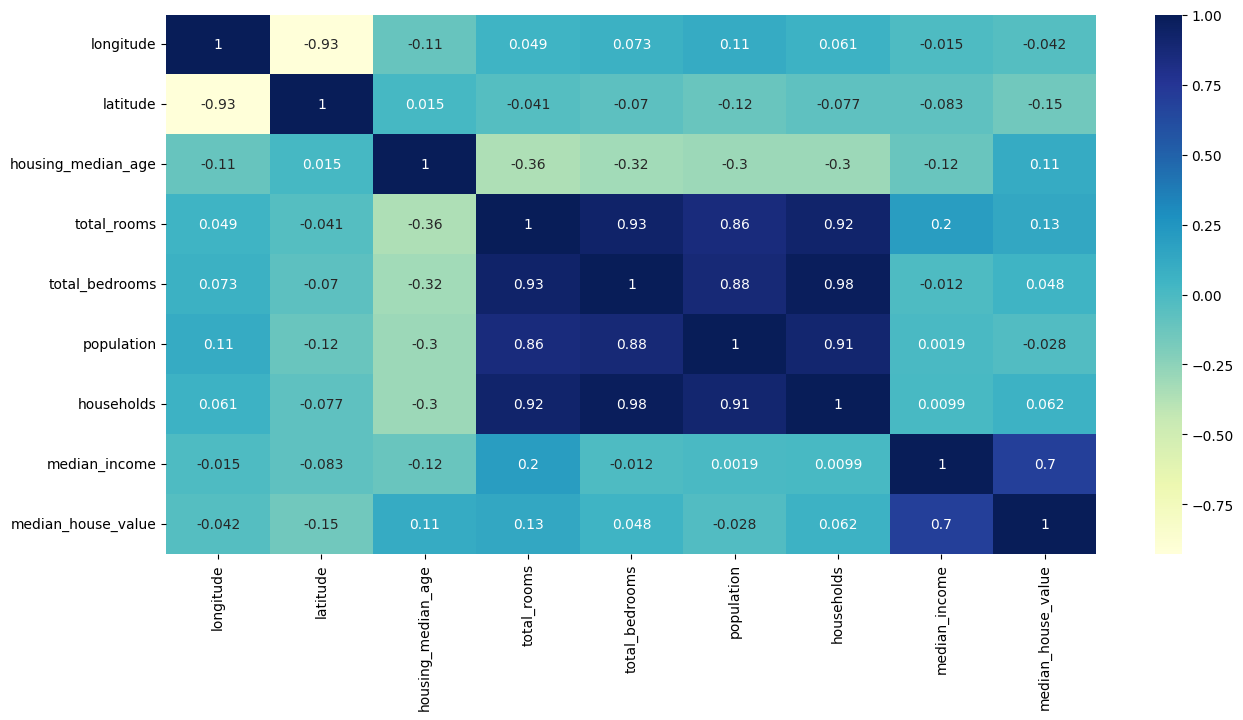

In [12]:
plt.figure(figsize= (15,7))
sns.heatmap(train_data.corr(),annot = True,cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

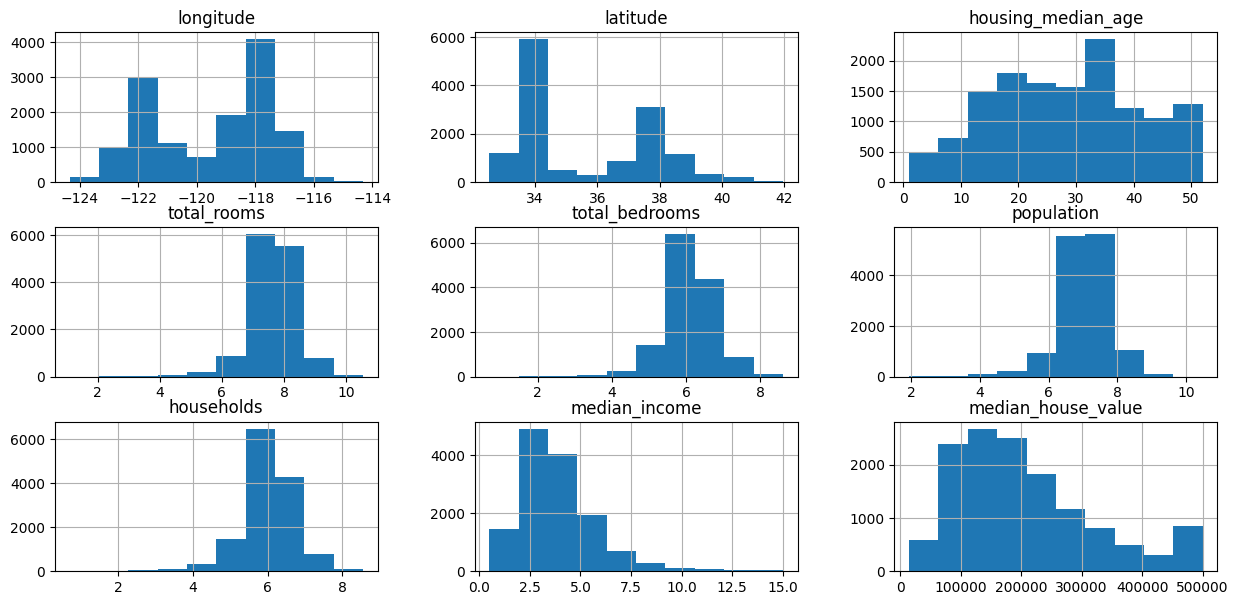

In [13]:
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)
train_data.hist(figsize=(15,7))

In [14]:
#one hot encoding
train_data =train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis = 1)
plt.figure(figsize= (15,7))
sns.heatmap(train_data.corr(),annot = True,cmap="YlGnBu")


AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

<Axes: xlabel='latitude', ylabel='longitude'>

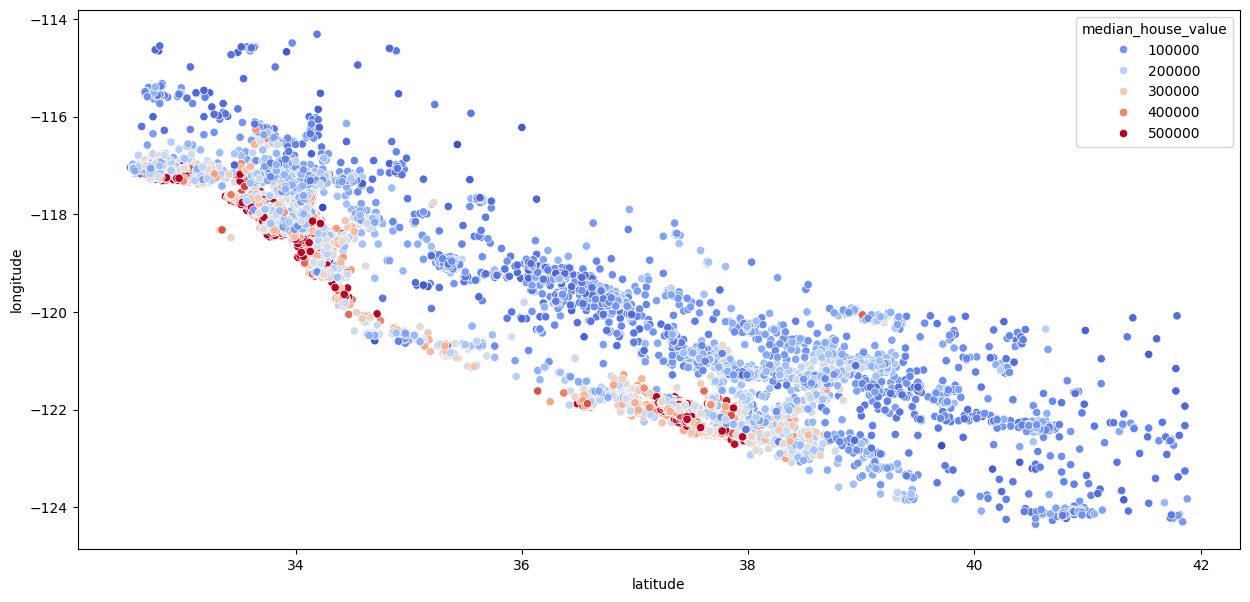

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="latitude",y="longitude",data= train_data,hue="median_house_value",palette="coolwarm")

<Axes: >

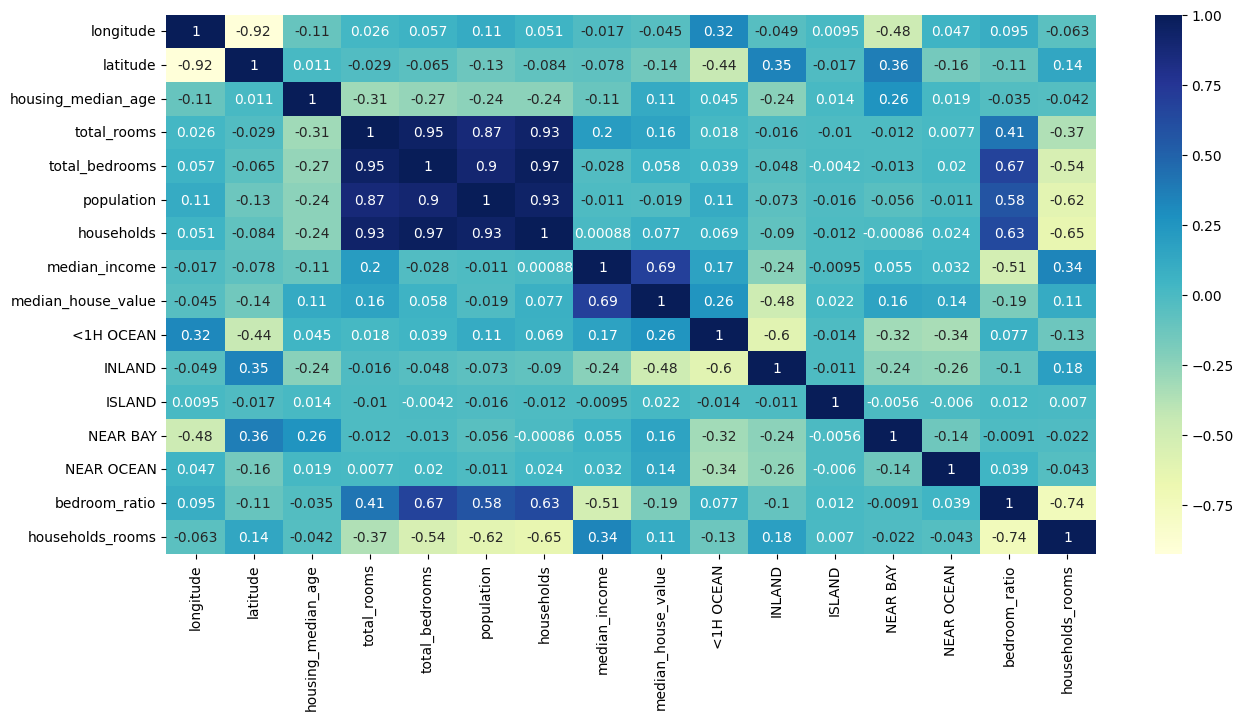

In [ ]:
#adding bedroom_ratio and householdsrooms heatmap
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms']/train_data['households']
plt.figure(figsize= (15,7))
sns.heatmap(train_data.corr(),annot = True,cmap="YlGnBu")

In [ ]:
#linear Regression


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train,y_train =train_data.drop(['median_house_value'],axis=1),train_data["median_house_value"]
x_train_s = scaler.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_train_s,y_train)


test_data =x_test.join(y_test)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)
test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] +1)


test_data =test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms']/test_data['households']

x_test,y_test =test_data.drop(['median_house_value'],axis=1),test_data["median_house_value"]
x_test_s =scaler.transform(x_test)
accuracy =reg.score(x_test_s,y_test)
print(accuracy)


0.6739076524500899


In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train_s,y_train)

forest.score(x_test_s,y_test)


0.8162494300376493